# RQ1 Analysis | Anthony Hernandez | SI 305

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## RQ #1: *In the context of Ann Arbor's winter climate, which watermain material types demonstrate the highest resilience by experiencing the least number of breaks?*

### Data Cleaning All Watermain Attributes data:

In [3]:
# read in dataset and dropped columns not applicable to RQ
url_all_watermain_attributes_data = 'https://docs.google.com/spreadsheets/d/11MWo0d_6BOt7xw7jRkW4yVzdyfhDJoU-dfq7nHfpLzI/gviz/tq?tqx=out:csv'
all_watermain_attributes_data = pd.read_csv(url_all_watermain_attributes_data)
all_watermain_attributes_data = all_watermain_attributes_data[['FACILITYID', 'INSTALLDAT', 'MATERIAL', 'DIAMETER']]

##### I will be using this data as a reference to how many pipes of specific material were installed on or after 1/1/1950

In [4]:
# used .info() to understand what types of data i am working with.
all_watermain_attributes_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32653 entries, 0 to 32652
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   FACILITYID  32182 non-null  object 
 1   INSTALLDAT  29227 non-null  object 
 2   MATERIAL    32617 non-null  object 
 3   DIAMETER    32653 non-null  float64
dtypes: float64(1), object(3)
memory usage: 1020.5+ KB


In [5]:
# converted 'INSTALLDAT' to dt object
all_watermain_attributes_data['INSTALLDAT'] = pd.to_datetime(all_watermain_attributes_data['INSTALLDAT'])

# filtered dataset to pipes intalled on or after 1/1/1950 
all_watermain_attributes_data = all_watermain_attributes_data[all_watermain_attributes_data['INSTALLDAT'] >= pd.to_datetime('1950-01-01')]
all_watermain_attributes_data.head()

,FACILITYID,INSTALLDAT,MATERIAL,DIAMETER
0,22-00008,1963-05-16,CI,6.0
1,22-00016,1950-01-01,CI,6.0
2,22-00017,1950-01-01,CI,6.0
5,22-00547,1990-01-01,DI,6.0
6,22-00816,1968-05-06,DI,6.0


In [33]:
# used .value_count() on 'MATERIAL' to get an understanding of what materials are in this dataset
all_watermain_attributes_data['MATERIAL'].value_counts().reset_index()

,index,MATERIAL
0,DI,20861
1,CI,4378
2,PVC,171
3,HDPE,32
4,AC,27
5,STL,7


In [34]:
# used .value_count() on 'DIAMETER' to get an understanding of what pipe diameters are in this dataset
all_watermain_attributes_data['DIAMETER'].value_counts().reset_index()

,index,DIAMETER
0,8.00,7797
1,12.00,6846
2,6.00,6743
3,16.00,1426
4,10.00,890
5,20.00,657
6,4.00,551
7,24.00,215
8,2.00,124
9,30.00,77


In [7]:
# dropped rows that do not contain materials in the watermain breaks dataset 
rows_to_drop = all_watermain_attributes_data[all_watermain_attributes_data['MATERIAL'].isin(['OTH', 'C909', 'GAL', 'UNK', 'CU', 'RC'])].index
all_watermain_attributes_data = all_watermain_attributes_data.drop(rows_to_drop)

# renamed all ST values as STL since they are the same material
all_watermain_attributes_data['MATERIAL'] = all_watermain_attributes_data['MATERIAL'].replace('ST', 'STL')

# showed the distribution of pipe materials as a percentage
all_watermain_attributes_data['MATERIAL'].value_counts() * 100/len(all_watermain_attributes_data)

DI      81.833516
CI      17.174015
PVC      0.670799
HDPE     0.125530
AC       0.105916
STL      0.027460
Name: MATERIAL, dtype: float64

In [8]:
# created a variable that tracks the quantity of pipes material laid since 1950 for future reference 
material_counts = all_watermain_attributes_data['MATERIAL'].value_counts()

### Data Cleaning of Watermain Breaks and Watermain Attributes data:

In [9]:
# read in Watermain Breaks dataset needed for analysis, dropped columns not applicable for analysis.
url_watermain_breaks = 'https://drive.google.com/file/d/1LTYIn0aq4gBmD65B508miLt8cSzfLom8/view?usp=sharing'
url_download_watermain_breaks ='https://drive.google.com/uc?export=download&id=' + url_watermain_breaks.split('/')[-2]
watermain_breaks_data = pd.read_csv(url_download_watermain_breaks)
watermain_breaks_data = watermain_breaks_data.drop(columns=['Project','SR Closed By','Init. App','SR Description','WO Sid','SR Problem Code','SR Date Initiated','SR Date Submit','SR Date Closed','SR Priority','SR Status','SR Address','Update Map','Submit To','Address', 'Location', 'Initiated By', 'Date Submit To', 'Completed By', 'Canceled By_ID', 'Cancel Reason', 'Date Canceled', 'Closed By', 'Parent WOID', 'Instructions', 'Resolution','Printed On','SR Initiated BY','SR Submit To'])

# used .info() to understand what types of data i am working with after column filter.
watermain_breaks_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 966 entries, 0 to 965
Data columns (total 23 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Work Order ID       966 non-null    int64  
 1   Priority            963 non-null    float64
 2   Status              966 non-null    object 
 3   Actual Start        475 non-null    object 
 4   Actual Finish       904 non-null    object 
 5   Date Initiated      966 non-null    object 
 6   Expense Type        966 non-null    object 
 7   Canceled            966 non-null    object 
 8   Closed Date         863 non-null    object 
 9   Total Cost          966 non-null    float64
 10  Labor Cost          966 non-null    float64
 11  Material Cost       966 non-null    float64
 12  Equipment Cost      966 non-null    float64
 13  Permit Cost         966 non-null    int64  
 14  Unattached          966 non-null    object 
 15  Request Ids         594 non-null    object 
 16  Is React

In [10]:
# read in Water Main Attributes dataset and selected columns of interest.
watermain_attributes_data = pd.read_csv('https://docs.google.com/spreadsheets/d/1pIrZNiLOfzLmbNErw2JdtS0X0exFCEPLYovPrTzEauk/gviz/tq?tqx=out:csv')
watermain_attributes_data = watermain_attributes_data.rename(columns={'WORKORDERI': 'Work Order ID'})
watermain_attributes_data = watermain_attributes_data[['FACILITYID','INSTALLDAT','SUBTYPE','MATERIAL','LENGTH','DIAMETER','DEPTH','STATUS','Work Order ID','INITIATE DATE','NIEGHBORHOOD NUMBER']]

# used .info() to understand what types of data i am working with after filter.
watermain_attributes_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 876 entries, 0 to 875
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   FACILITYID           876 non-null    object 
 1   INSTALLDAT           868 non-null    object 
 2   SUBTYPE              876 non-null    int64  
 3   MATERIAL             876 non-null    object 
 4   LENGTH               876 non-null    float64
 5   DIAMETER             876 non-null    float64
 6   DEPTH                876 non-null    float64
 7   STATUS               876 non-null    object 
 8   Work Order ID        876 non-null    int64  
 9   INITIATE DATE        876 non-null    object 
 10  NIEGHBORHOOD NUMBER  876 non-null    int64  
dtypes: float64(3), int64(3), object(5)
memory usage: 75.4+ KB


In [11]:
# merged both datasets on Work order ID number
main_data = pd.merge(watermain_breaks_data, watermain_attributes_data, on='Work Order ID', how = 'inner')

In [12]:
# filtered main_data to pipes installed on or after 1/1/1950
main_data['INSTALLDAT'] = pd.to_datetime(main_data['INSTALLDAT'])
main_data = main_data[main_data['INSTALLDAT'] >= pd.to_datetime('1950-01-01')]

In [13]:
# replaced NaN rows of 'Actual Start' with 'Actual Finish' data
main_data['Actual Start'] = main_data['Actual Start'].fillna(main_data['Actual Finish'])

# converted actual start and finish dates to a datetime object since these dates are of interest for this RQ
main_data['Actual Start'] = pd.to_datetime(main_data['Actual Start'])
main_data['Actual Finish'] = pd.to_datetime(main_data['Actual Finish'])

# dropped any remaining NaN rows in the 'Actual Start' or 'Actual finish' columns
main_data.dropna(subset=['Actual Start', 'Actual Finish'], how='all', inplace=True)

In [14]:
# created a month column to track what month watermain break occured
main_data['Month'] = main_data['Actual Start'].dt.month

# renamed all 'ST' values in MATERIAL to 'STL' since they are the same
main_data['MATERIAL'] = main_data['MATERIAL'].replace('ST', 'STL')

In [15]:
# narrowed down columns to final columns of interest for RQ1
main_data = main_data[['Work Order ID','FACILITYID', 'Actual Start', 'Actual Finish','Month','MATERIAL','LENGTH','DIAMETER','DEPTH', 'INSTALLDAT']]

##### My research question only focuses on pipe materials and months of watermain break occurences. I want to look into the values within the "MATERIALS" column and "Month" to see how they correspond with my RQ.

In [16]:
# 'MATERIAL' column value count breakdown
main_data['MATERIAL'].value_counts().reset_index()

,index,MATERIAL
0,CI,408
1,DI,182
2,STL,2
3,HDPE,1
4,PVC,1
5,AC,1


In [17]:
# 'Month' column value count breakdown
main_data['Month'].value_counts().reset_index()

,index,Month
0,1,115
1,2,93
2,12,80
3,11,71
4,10,39
5,8,33
6,4,31
7,3,29
8,6,29
9,7,28


##### I am interested in looking at the watermain breaks during winter months (November - March inclusive). To examine this, i will create a new dataset called winter_main_data because i think it will be interesting to compare how the results will differ from the whole year.

In [18]:
# created new variable of values that expierenced a break in winter months
winter_main_data = main_data[(main_data['Month'] >= 11) | (main_data['Month'] <= 3)]
winter_main_data

,Work Order ID,FACILITYID,Actual Start,Actual Finish,Month,MATERIAL,LENGTH,DIAMETER,DEPTH,INSTALLDAT
0,332757,00-059005,2012-12-28 00:00:00,2012-12-28 00:00:00,12,DI,82.0,8.0,0.0,2006-04-11
2,333296,00-12021,2013-01-05 00:00:00,2013-01-05 00:00:00,1,DI,172.0,8.0,0.0,1965-03-22
4,333352,00-23359,2013-01-08 00:00:00,2013-01-08 00:00:00,1,CI,0.0,6.0,0.0,1950-01-01
5,333352,00-23359,2013-01-08 00:00:00,2013-01-08 00:00:00,1,CI,226.0,6.0,0.0,1950-01-01
6,333352,00-23359,2013-01-08 00:00:00,2013-01-08 00:00:00,1,CI,561.0,6.0,0.0,1950-01-01
...,...,...,...,...,...,...,...,...,...,...
831,828030,00-062913,2023-01-23 22:00:00,2023-01-24 04:30:00,1,DI,202.0,12.0,0.0,2001-12-01
833,830034,00-19832,2023-02-08 07:00:00,2023-02-08 13:34:00,2,CI,108.0,6.0,0.0,1962-08-23
835,831983,00-059738,2023-02-22 01:53:00,2023-02-22 01:53:00,2,CI,459.0,8.0,0.0,1960-11-30
836,831984,00-02416,2023-02-22 00:05:00,2023-02-22 04:30:00,2,CI,48.0,6.0,0.0,1964-01-13


# Analysis:

## RQ #1: *In the context of Ann Arbor's winter climate, which watermain material types demonstrate the highest resilience by experiencing the least number of breaks?*

## Aggregate Month column by Material: 

#### I want to see the distribution of monthly watermain breaks by material. This will help me gain a general understanding of how different pipe materials react to winter climate.

In [19]:
# used groupby to show what pipe materials broke throughout different months
pipe_break_months_all = main_data.groupby('MATERIAL')['Month'].value_counts().unstack().fillna(0.0)

# created a Total column to calculate the sum of watermain breaks per material throughout different months
pipe_break_months_all['Total'] = pipe_break_months_all.sum(axis=1)
pipe_break_months_all


Month,1,2,3,4,5,6,7,8,9,10,11,12,Total
MATERIAL,,,,,,,,,,,,,
AC,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
CI,87.0,68.0,20.0,15.0,14.0,15.0,14.0,21.0,15.0,30.0,49.0,60.0,408.0
DI,28.0,24.0,9.0,16.0,7.0,13.0,14.0,11.0,9.0,9.0,22.0,20.0,182.0
HDPE,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
PVC,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
STL,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,2.0


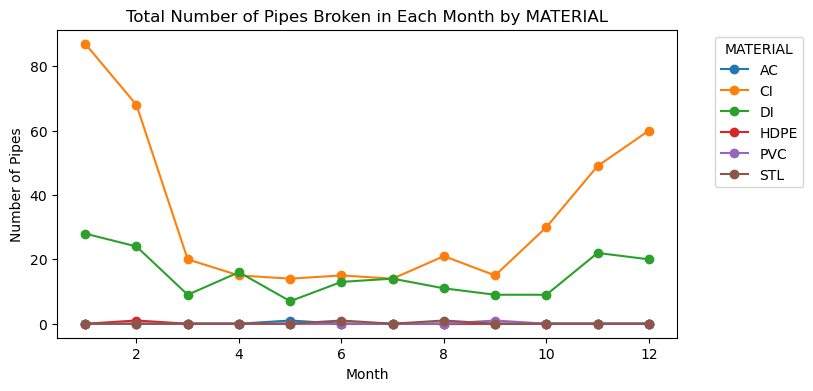

In [20]:
# made a line chart to visualize my previous findings and to see how winter affects watermain break reporting of each material
pipe_break_months_all_line = pipe_break_months_all.drop('Total', axis=1) 

ax = pipe_break_months_all_line.transpose().plot(kind='line', marker='o', figsize=(8, 4))
ax.set_ylabel('Number of Pipes')
ax.set_xlabel('Month')
ax.set_title('Total Number of Pipes Broken in Each Month by MATERIAL')
plt.legend(title='MATERIAL', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.show()

#### Similar to the EDA of the watermain reporting dataset, the findings reveal a noticeable increase in watermain break occurrences as Ann Arbor enters the winter months. This graph proves insightful as it sheds light on the key pipe materials contributing significantly to the reported incidents of watermain breaks.

In [21]:
# used groupby to narrow down previous results and examine what pipe materials broke in winter months
pipe_break_months_winter = winter_main_data.groupby('MATERIAL')['Month'].value_counts().unstack().fillna(0.0)

# created a total column to calculate the sum of pipe breaks per material
pipe_break_months_winter['Total'] = pipe_break_months_winter.sum(axis=1)
pipe_break_months_winter

Month,1,2,3,11,12,Total
MATERIAL,,,,,,
CI,87.0,68.0,20.0,49.0,60.0,284.0
DI,28.0,24.0,9.0,22.0,20.0,103.0
HDPE,0.0,1.0,0.0,0.0,0.0,1.0


#### The table illustrates which pipe materials encountered water main breaks during winter months. This is significant as it suggests that approximately half of our pipe materials may remain unaffected by colder climates.

## Analyze the proportion of reported watermain breaks that occured in the winter: 

#### Building upon my previous findings, I aim to investigate the ratio of reported watermain breaks during the winter and pinpoint which types of pipes encounter the lowest incidence of watermain breaks in winter conditions.

In [22]:
# created a new table called merged_table containing the totals of my previous two tables
merged_table = pd.merge(pipe_break_months_all['Total'], pipe_break_months_winter['Total'], on='MATERIAL', how='left', suffixes=('_breaks_all', '_breaks_winter')).fillna(0)

# created a new column that calculates the proportion of all reported watermain breaks that occured in the winter 
merged_table['Winter_Watermain_Break_%'] = ((pipe_break_months_winter['Total'] / pipe_break_months_all['Total']) * 100).fillna(0.0)
merged_table

,Total_breaks_all,Total_breaks_winter,Winter_Watermain_Break_%
MATERIAL,,,
AC,1.0,0.0,0.000000
CI,408.0,284.0,69.607843
DI,182.0,103.0,56.593407
HDPE,1.0,1.0,100.000000
PVC,1.0,0.0,0.000000
STL,2.0,0.0,0.000000


#### As illustrated in the table, both CI and DI pipes exhibit a notable increase in watermain breaks during winter months. It's worth noting that HDPE also recorded a 100% watermain break incidence in winter; however, this observation lacks statistical significance due to the exceptionally small sample size—just one recorded watermain break since the 1950s. On the other hand, AC, PVC, and STL watermains demonstrate consistently low overall watermain break rates, with none occurring during winter.

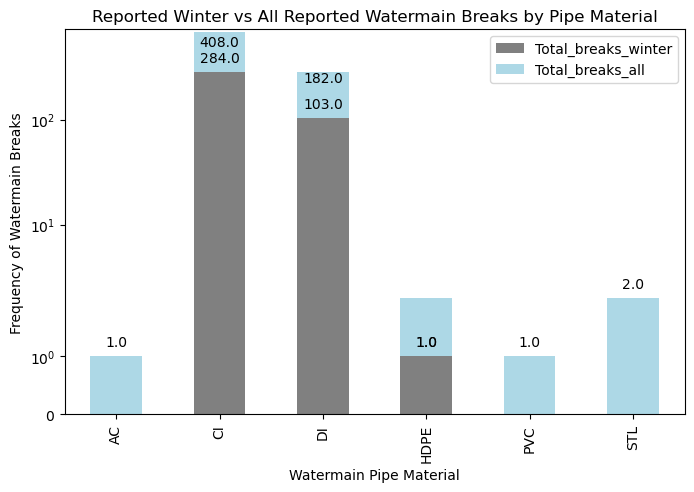

In [23]:
# created a stacked bar chart to analyze my previous findings
ax = merged_table[['Total_breaks_winter', 'Total_breaks_all']].plot(kind='bar',color = ['grey', 'lightblue'], stacked=True, figsize=(8, 5))
ax.set_ylabel('Frequency of Watermain Breaks')
ax.set_xlabel('Watermain Pipe Material')
ax.set_title('Reported Winter vs All Reported Watermain Breaks by Pipe Material')
ax.set_yscale('symlog')

for p in ax.patches:
    height = p.get_height()
    if height > 0:
        ax.annotate(f'{height}', (p.get_x() + p.get_width() / 2., height),
                    ha='center', va='center', xytext=(0, 10), textcoords='offset points')

plt.show()


#### According to the bar chart, there is a notable increase in the frequency of watermain breaks during winter for both CI and DI pipes as opposed to their year-round break reports.

## Measuring the fail rate of all pipe materials laid after 1950 in winter conditions: 

#### I want to evaluate the percentage of all pipe material laid since 1950 that have experienced a watermain break in the winter. This analysis aims to offer insights into the prevalence of incidents and vulnerabilities within the entirety of the installed pipes from that time period.

In [24]:
# using the variable i created from the 'All Watermain Attributes' dataset, i merged the total number of watermains made out of specific materials to my datatable 
merged_table_2 = pd.merge(merged_table, material_counts, left_index=True, right_index=True, how='inner')
merged_table_2 = merged_table_2.rename(columns={'MATERIAL': 'Total_Watermains'})
merged_table_2

,Total_breaks_all,Total_breaks_winter,Winter_Watermain_Break_%,Total_Watermains
AC,1.0,0.0,0.000000,27
CI,408.0,284.0,69.607843,4378
DI,182.0,103.0,56.593407,20861
HDPE,1.0,1.0,100.000000,32
PVC,1.0,0.0,0.000000,171
STL,2.0,0.0,0.000000,7


In [25]:
# dropped Winter_Watermain_Break_% since it wasnt applicable to this analysis
merged_table_2 = merged_table_2.drop('Winter_Watermain_Break_%', axis=1)

# made two more columns, the first calculates the percent of watermains installed after 1950 that have failed, the second caculates the proportion that failed in winter months 
merged_table_2['All_Watermain_Fail_Rate_%'] = (merged_table_2['Total_breaks_all'] / merged_table_2['Total_Watermains']) * 100
merged_table_2['Winter_Watermain_Fail_Rate_%'] = (merged_table_2['Total_breaks_winter'] / merged_table_2['Total_Watermains']) * 100

merged_table_2

,Total_breaks_all,Total_breaks_winter,Total_Watermains,All_Watermain_Fail_Rate_%,Winter_Watermain_Fail_Rate_%
AC,1.0,0.0,27,3.703704,0.000000
CI,408.0,284.0,4378,9.319324,6.486980
DI,182.0,103.0,20861,0.872441,0.493744
HDPE,1.0,1.0,32,3.125000,3.125000
PVC,1.0,0.0,171,0.584795,0.000000
STL,2.0,0.0,7,28.571429,0.000000


#### This table is very important as it offers detailed information of the total number of watermains developed per material since the 1950s. By analyzing the cumulative data, we can now conduct a thorough assessment of how different pipe materials have performed across all seasons, with a particular focus on winter conditions.

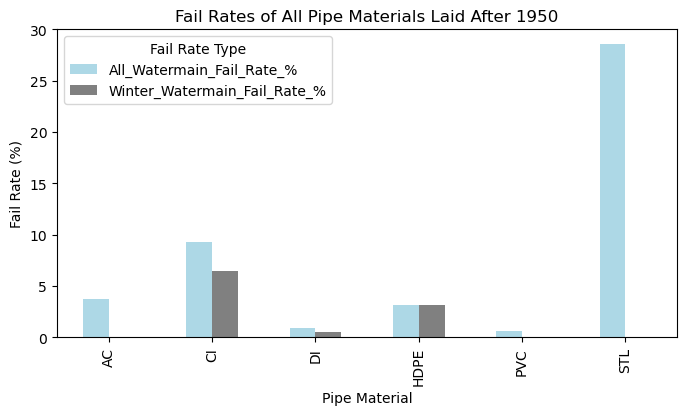

In [26]:
# created a side by side bar chart to analyze my previous findings
merged_table_2[['All_Watermain_Fail_Rate_%', 'Winter_Watermain_Fail_Rate_%']].plot(kind='bar', color = ['lightblue', 'grey'], figsize=(8, 4))
plt.xlabel('Pipe Material')
plt.ylabel('Fail Rate (%)')
plt.title('Fail Rates of All Pipe Materials Laid After 1950')
plt.legend(title='Fail Rate Type')
plt.show()

#### This chart illustrates the comparison between the total reported watermain breaks and those specifically occurring in winter, relative to the overall population of watermains for each material. Through this we can see how poor cold temperature tolerance of materials contributes to the overall watermain system

## Diving Deeper, Exploring the relationship between pipe diameter and winter watermain breaks: 

#### Last, I want to determine if the diameter of pipe material played a role in winter watermain breaks. Hopefully, the results of this results will shed more light on what material and specific size is best for future development.

In [27]:
# used .value_counts() to count the diameter of pipe of all watermains. This helps me understand why some watermain breaks per diameter might be higher than others
all_watermain_attributes_data['DIAMETER'].value_counts().reset_index()

,index,DIAMETER
0,8.00,7797
1,12.00,6846
2,6.00,6743
3,16.00,1426
4,10.00,890
5,20.00,657
6,4.00,551
7,24.00,215
8,2.00,124
9,30.00,77


/var/folders/0k/xs0rlfyd4_x_ft_xsh29q6jc0000gn/T/ipykernel_46422/900778837.py:5: FutureWarning: Passing `palette` without assigning `hue` is deprecated.
  sns.stripplot(x='MATERIAL', y='DIAMETER', data=winter_main_data, jitter=True, palette='Set2', size=8)


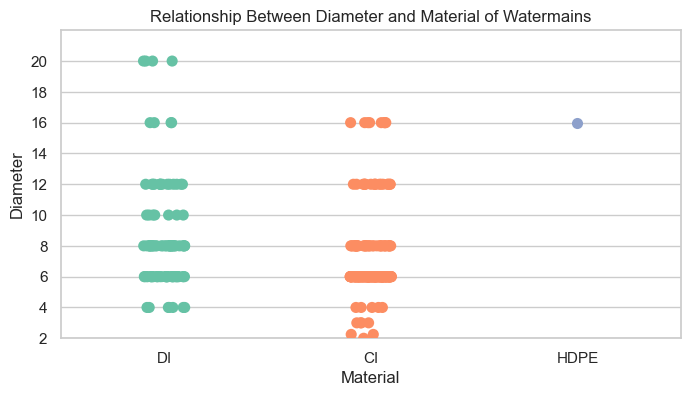

In [28]:
# using the winter_main_data datset, i created a categorical scatterplot to visualize the spread of each watermain break in the winter by diameter and material
sns.set(style="whitegrid")

plt.figure(figsize=(8, 4))
sns.stripplot(x='MATERIAL', y='DIAMETER', data=winter_main_data, jitter=True, palette='Set2', size=8)
plt.title('Relationship Between Diameter and Material of Watermains')
plt.xlabel('Material')
plt.ylabel('Diameter')
plt.ylim(2, max(winter_main_data['DIAMETER']) + 2)
plt.yticks(range(2, 22, 2))

plt.show()

#### This graph reveals that the majority of watermain breaks occur within the 6.0-12.0 range, which aligns with the prevalent use of this diameter in the construction of watermains.

In [29]:
# aggregated my winter months and full year datasets by material and diameter to examine relationship
material_diameter_count_all = main_data.groupby('DIAMETER')['MATERIAL'].value_counts().unstack().fillna(0.0)
material_diameter_count_all = material_diameter_count_all.add_suffix('_ALL')
material_diameter_count_winter = winter_main_data.groupby('DIAMETER')['MATERIAL'].value_counts().unstack().fillna(0.0)
material_diameter_count_winter = material_diameter_count_winter.add_suffix('_WN')

In [30]:
# joined both of my aggregated datasets to display the differenece between winter months and the whole year watermain breaks by material
merged_data_3 = pd.concat([material_diameter_count_all, material_diameter_count_winter], axis=1)
merged_data_3

MATERIAL,AC_ALL,CI_ALL,DI_ALL,HDPE_ALL,PVC_ALL,STL_ALL,CI_WN,DI_WN,HDPE_WN
DIAMETER,,,,,,,,,
2.00,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
2.25,0.0,2.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0
3.00,0.0,4.0,0.0,0.0,0.0,0.0,4.0,0.0,0.0
4.00,0.0,19.0,11.0,0.0,0.0,0.0,5.0,7.0,0.0
6.00,0.0,283.0,57.0,0.0,0.0,0.0,212.0,34.0,0.0
8.00,1.0,60.0,57.0,0.0,1.0,0.0,35.0,33.0,0.0
10.00,0.0,0.0,8.0,0.0,0.0,0.0,0.0,7.0,0.0
12.00,0.0,27.0,31.0,0.0,0.0,2.0,17.0,14.0,0.0
16.00,0.0,10.0,11.0,1.0,0.0,0.0,8.0,4.0,1.0


In [31]:
# created another table using my aggregated data to calculate what percent of pipe diameter/material contributed to the overall reported waterbreaks
materials = ['AC','CI', 'DI', 'HDPE', 'PVC', 'STL']
diameter_material_break_rate = pd.DataFrame()

for material in materials:
    try:
        diameter_material_break_rate[material] = ((material_diameter_count_winter[f'{material}_WN'] / material_diameter_count_all[f'{material}_ALL'])*100)
    except:
        diameter_material_break_rate[material] = 0.0
diameter_material_break_rate = diameter_material_break_rate.fillna(0.0)

# mean_percent_per_material = diameter_material_break_rate.mean(axis=0)
# diameter_material_break_rate.loc['Mean'] = mean_percent_per_material

diameter_material_break_rate


,AC,CI,DI,HDPE,PVC,STL
DIAMETER,,,,,,
2.00,0.0,100.000000,0.000000,0.0,0.0,0.0
2.25,0.0,100.000000,0.000000,0.0,0.0,0.0
3.00,0.0,100.000000,0.000000,0.0,0.0,0.0
4.00,0.0,26.315789,63.636364,0.0,0.0,0.0
6.00,0.0,74.911661,59.649123,0.0,0.0,0.0
8.00,0.0,58.333333,57.894737,0.0,0.0,0.0
10.00,0.0,0.000000,87.500000,0.0,0.0,0.0
12.00,0.0,62.962963,45.161290,0.0,0.0,0.0
16.00,0.0,80.000000,36.363636,100.0,0.0,0.0


##### This table displays the percentage of watermain breaks categorized by material and pipe diameter, specifically attributed to winter conditions. This allows us to identify which combination of pipe material and diameter exhibits the highest tolerance for cold weather.

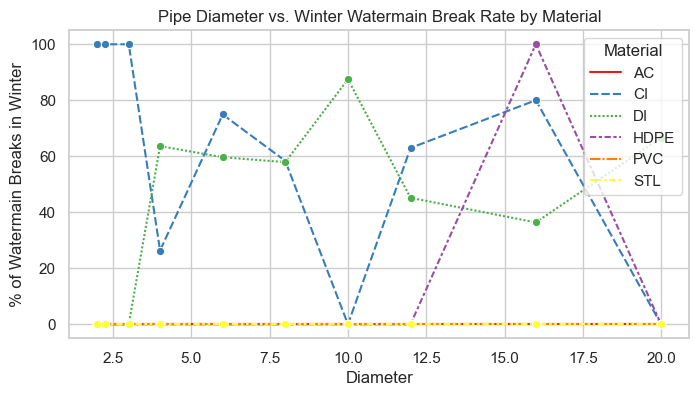

In [32]:
# using my previous table, i created a line chart to analyze any trends or patterns created by pipe diameter
sns.set(style="whitegrid")

plt.figure(figsize=(8, 4))
sns.lineplot(data=diameter_material_break_rate, marker='o', palette='Set1')
plt.title('Pipe Diameter vs. Winter Watermain Break Rate by Material')
plt.xlabel('Diameter')
plt.ylabel('% of Watermain Breaks in Winter')
plt.legend(title='Material')

plt.show()

##### This chart visually represents the influence of different pipe diameters on the overall watermain reports during the winter season. While no specific trends were identified, it is intriguing to note that DI pipes exhibit a slight advantage over CI pipes in regions characterized by the highest diameter frequency (6.0-12.0) within our existing watermain system.

# Discussion of Results:

### Answer for RQ1

**In the context of winter weather, the pipe material's that showed the most resilance to watermain breaks are DI (Ductile Iron) and HDPE**. Although some of my findings may conflict with this statement, there are multiple factors that lead me to conclude to these materials. Additionally, DI showed a slight advantage over HDPE, but both materials should be reccomended as pipe materials for future watermain development.

After establishing my primary dataframes, one containing data on watermain breaks during winter months and the other encompassing all months, several insights emerged and led to this conclusion. The initial breakthrough transpired when I grouped the datasets by pipe material and the month in which the watermain break occurred. This facilitated the calculation of the proportion of watermain breaks that took place during winter months, shedding light on materials thats experience the least amount watermain breaks in winter months, specifically, DI and HPE.

While exploring the connection between winter watermain breaks and the total number of watermains constructed per material, I conducted an analysis to understand how the entire population of watermain materials has been influenced by winter temperatures. The findings revealed that the overall population of DI was the least affected during winter months. Specifically, only 0.87% of the entire DI population experienced a watermain break in winter, followed by HDPE at 3.12%.

In my final exploration, I delved into the relationship between pipe material and diameter, aiming to uncover potential trends associated with different pipe diameters. Despite encountering numerous zero values due to small sample sizes, this analysis allowed me to eliminate CI as a top-performing pipe material for winter conditions. A notable observation emerged when comparing the data between DI and CI on the line graph—DI consistently demonstrated a lower contribution to watermain breaks across all pipe diameter sizes compared to CI.

***Uncertanties / Limitations / Judgment Calls***


While I stand by my overall conclusion, I acknowledge that some of the findings from my analysis may not entirely support it, primarily due to judgment calls made throughout the process. Specifically, in various analyses, STL, AC, and PVC emerged as seemingly the most resistant to cold weather, often showing zero watermain breaks in winter months. However, further research uncovered that despite their promising results, these materials pose serious health risks to communities and are strongly discouraged for use. Additionally, the observations for these materials were exceptionally low in all datasets.

Given my project's goal of recommending a pipe material for future development, I decided not to include these materials in the recommended list. This decision was driven by a combination of their potential negative effect on people's health and the ethical consideration of not recommending materials that could pose risks. Instead, I focused on safe materials that demonstrated optimal performance in winter months to form my conclusion.

### Interpretation of Findings


The insights gained from this analysis paint a compelling picture. The dominance of CI in Ann Arbor's watermain system, a material associated with the highest proportion of overall watermain breaks, especially during winter, highlights the pressing need for a more robust material in future watermain development. Notably, even though roughly half of reported main breaks for DI occur in winter, this represents a considerable advancement compared to CI, where 69% of main breaks occur during the winter months.

In addition, the comparison of watermain breaks to the overall population of pipe materials utilized in the Ann Arbor water system shed light on the influence of winter watermain breaks on the broader material landscape. Once again, CI demonstrated the worse results, significantly affecting the overall CI population. In contrast, less than one percent of DI and approx three percent of HDPE were affected by winter watermain breaks. This not only underscores the resilience of certain pipes in winter conditions but also offers a preview of the durability of different pipe materials.

### Impact on Analysis


The discoveries from Research Question 1 offer valuable insights that will influence my approach to Research Questions 2 and 3.

RQ2. Is there a correlation between the choice of pipe material and the average lifespan before replacement in water main infrastructure, and how do variations in material impact longevity in Ann Arbor?
- The second part of this analysis has already provided a sneak peak into this research question by offering insights into all watermains that have encountered a break in comparison to the overall population. I can already estimate what pipe material will have the longest lifespan before requiring replacement. Still, further analysis is still required.

RQ3. Which pipe materials demonstrate the highest cost efficiency and sustainability in Ann Arbor's water main infrastructure, considering factors such as initial costs, maintenance costs, and durability?
- The analysis I've recently concluded focused on assessing resilience in the context of winter months. I believe resilience and durability are greatly related; a pipe material must possess strong durability to withstand winter conditions. Therefore, I think that this question has already provided valuable insights into identifying the pipe material that is likely to be the most durable.